In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [7]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
stk_tickers = ['MSFT','IBM','GOOGL']
ccy_tickers = ['DEXJPUS','DEXUSUK']         ## 미국 달러/엔화 및 파운드/달러
idx_tickers = ['SP500','DJIA','VIXCLS']     
stk_data = web.DataReader(stk_tickers,'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [14]:
stk_data

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-07-25   69.490349  110.405060   48.451500   74.190002  139.761002   
2017-07-26   69.359222  109.778259   48.265499   74.050003  138.967499   
2017-07-27   68.525597  109.559242   47.625500   73.160004  138.690247   
2017-07-28   68.413200  108.970184   47.916500   73.040001  137.944550   
2017-07-31   68.094734  109.257187   47.275002   72.699997  138.307846   
...                ...         ...         ...         ...         ...   
2022-07-18  254.250000  138.130005  109.029999  254.250000  138.130005   
2022-07-19  259.529999  130.880005  113.809998  259.529999  130.880005   
2022-07-20  262.269989  129.179993  113.900002  262.269989  129.179993   
2022-07-21  264.839996  127.150002  114.339996  264.839996  127.150002   
2022-07-22  260.359985  128.250000  107.900002  260.359985  128.250000   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-07-25   48.451500   74.309998  141.003830   48.836498   73.500000   
2017-07-26   48.265499   74.379997  140.019119   48.697498   73.809998   
2017-07-27   47.625500   74.419998  139.005737   48.476002   72.320000   
2017-07-28   47.916500   73.309998  138.661575   48.089500   72.540001   
2017-07-31   47.275002   73.440002  138.556412   48.059502   72.410004   
...                ...         ...         ...         ...         ...   
2022-07-18  109.029999  260.839996  140.309998  113.680000  253.300003   
2022-07-19  113.809998  259.720001  132.559998  114.019997  253.679993   
2022-07-20  113.900002  264.869995  130.720001  115.400002  258.910004   
2022-07-21  114.339996  264.890015  128.809998  114.550003  257.029999   
2022-07-22  107.900002  265.329987  128.320007  112.339996  259.070007   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-07-25  139.608032   48.189999   73.800003  140.124283   48.535000   
2017-07-26  138.116638   48.011501   74.339996  139.837479   48.639000   
2017-07-27  137.323135   46.853001   73.760002  138.623322   48.459000   
2017-07-28  137.514343   47.265499   72.669998  138.441681   47.399502   
2017-07-31  137.829834   47.086498   73.300003  138.030594   48.000000   
...                ...         ...         ...         ...         ...   
2022-07-18  137.779999  108.370003  259.750000  140.149994  112.639999   
2022-07-19  127.720001  109.559998  257.579987  131.580002  110.849998   
2022-07-20  128.059998  112.480003  259.899994  130.699997  113.169998   
2022-07-21  125.129997  111.110001  259.790009  128.750000  114.279999   
2022-07-22  125.709999  106.500000  265.239990  127.029999  111.000000   

Attributes      Volume                           
Symbols           MSFT         IBM        GOOGL  
Date                                             
2017-07-25  22018700.0   4402509.0  118672000.0  
2017-07-26  16252200.0   4113290.0   44432000.0  
2017-07-27  36844200.0   6726617.0   74358000.0  
2017-07-28  18306700.0   3195321.0   36276000.0  
2017-07-31  23600100.0   4556062.0   45670000.0  
...                ...         ...          ...  
2022-07-18  20975000.0   8231700.0   43164600.0  
2022-07-19  25012600.0  29690500.0   36530900.0  
2022-07-20  22788300.0   9882000.0   35600400.0  
2022-07-21  22404700.0  11975400.0   32676200.0  
2022-07-22  21871000.0   6465200.0   48839800.0  

[1258 rows x 18 columns]

In [17]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period) 
Y.name = Y.name[-1]+'_pred'                 ## -a a번째 거를 지운다
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL','IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) \
    for i in  [return_period, return_period*3,\
        return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT','MSFT_3DT','MSFT_6DT','MSFT12_DT']
X = pd.concat([X1,X2,X3,X4],axis=1)
dataset = pd.concat([Y,X],axis=1).dropna().iloc[::return_period, :]         ## ::a a만큼의 간격으로 띄어서 쓴다
Y= dataset.loc[:, Y.name]
X= dataset.loc[:, X.columns]

In [28]:
dataset.head()

,MSFT_pred,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT12_DT
2017-10-18,0.013057,0.077591,0.007025,0.005238,-0.002046,0.002353,0.012371,0.022089,0.015452,0.049660,0.055773,0.050381
2017-10-25,0.056254,-0.038532,-0.021236,0.006707,0.005220,-0.001606,0.007394,0.109028,0.013057,0.051407,0.044469,0.085377
2017-11-01,0.016454,0.003447,0.050294,0.002986,0.000377,0.008648,0.004514,-0.096201,0.056254,0.084763,0.104319,0.138742
2017-11-08,-0.013852,-0.016099,0.014937,-0.003690,-0.011303,0.005806,0.005462,-0.042048,0.016454,0.085765,0.135425,0.143993
2017-11-16,0.000721,-0.007882,0.000716,-0.004507,0.004861,0.000395,-0.000153,0.113329,-0.005631,0.059851,0.095918,0.139640


<AxesSubplot:title={'center':'Correlation Matrix'}>

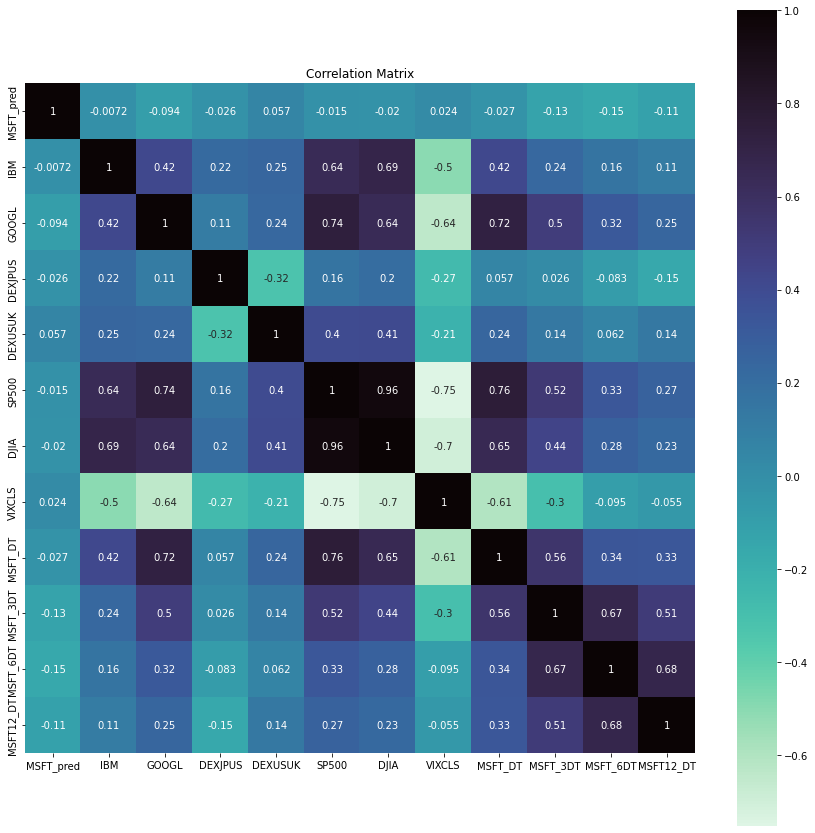

In [39]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation,vmax=1, square=True, annot=True, cmap='mako_r')

c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


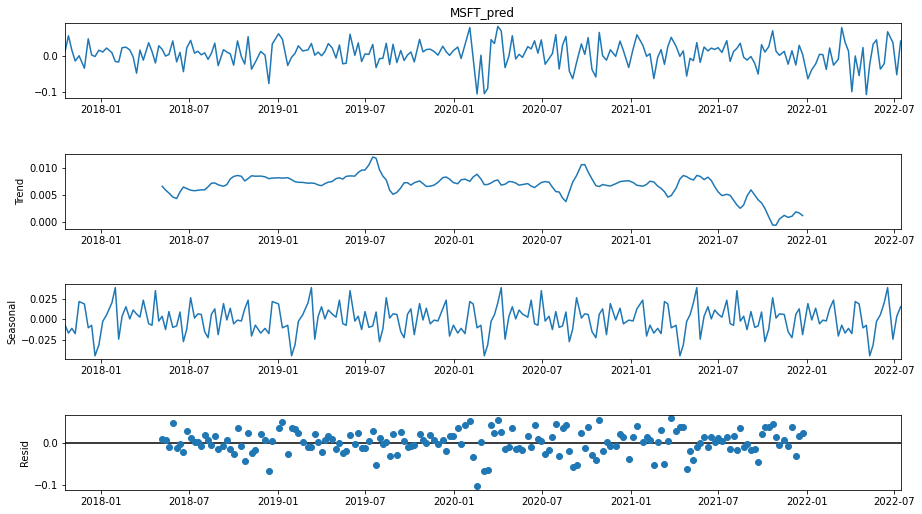

In [40]:
res = sm.tsa.seasonal_decompose(Y, freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


NameError: name 'plt' is not defined

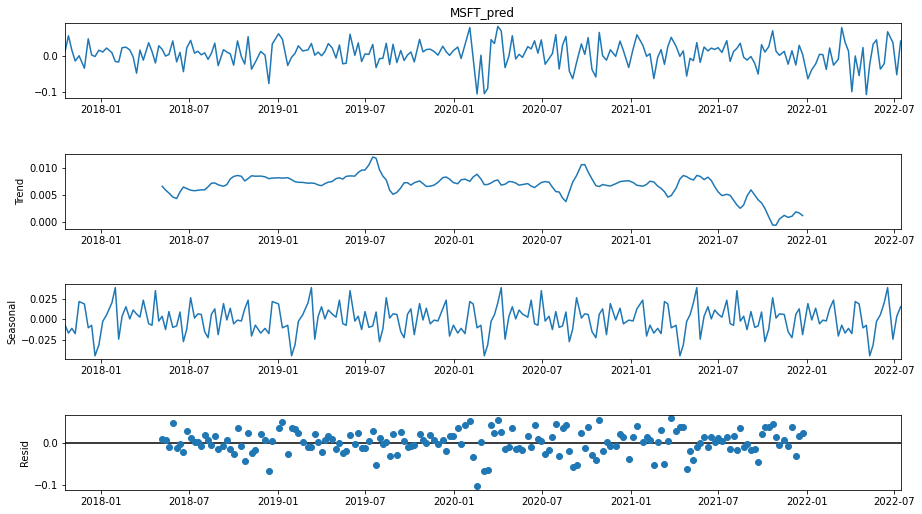

In [41]:
res = sm.tsa.seasonal_decompose(Y, freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()